In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pertpy as pt
import scanpy as sc
import torch
import scvi

%load_ext rpy2.ipython
plt.rcParams["figure.figsize"] = (7, 7)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [41]:
%%R
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("edgeR")

--- Please select a CRAN mirror for use in this session ---


* installing *source* package ‘BiocManager’ ...
** package ‘BiocManager’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (BiocManager)
* installing *source* package ‘statmod’ ...
** package ‘statmod’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.3.0-5) 14.3.0’
using Fortran compiler: ‘GNU Fortran (conda-forge gcc 14.3.0-5) 14.3.0’


x86_64-conda-linux-gnu-cc -I"/home/miniconda3/envs/pertpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/miniconda3/envs/pertpy/include -I/home/miniconda3/envs/pertpy/include -Wl,-rpath-link,/home/miniconda3/envs/pertpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/miniconda3/envs/pertpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1759444343764/work=/usr/local/src/conda/r-base-4.4.3 -fdebug-prefix-map=/home/miniconda3/envs/pertpy=/usr/local/src/conda-prefix  -c expectedDeviance.c -o expectedDeviance.o
x86_64-conda-linux-gnu-gfortran  -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/miniconda3/envs/pertpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1759444343764/work=/usr/local/src/conda/r-base-4.4.

installing to /home/miniconda3/envs/pertpy/lib/R/library/00LOCK-statmod/00new/statmod/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (statmod)
* installing *source* package ‘lattice’ ...
** package ‘lattice’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.3.0-5) 14.3.0’


x86_64-conda-linux-gnu-cc -I"/home/miniconda3/envs/pertpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/miniconda3/envs/pertpy/include -I/home/miniconda3/envs/pertpy/include -Wl,-rpath-link,/home/miniconda3/envs/pertpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/miniconda3/envs/pertpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1759444343764/work=/usr/local/src/conda/r-base-4.4.3 -fdebug-prefix-map=/home/miniconda3/envs/pertpy=/usr/local/src/conda-prefix  -c init.c -o init.o
x86_64-conda-linux-gnu-cc -I"/home/miniconda3/envs/pertpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/miniconda3/envs/pertpy/include -I/home/miniconda3/envs/pertpy/include -Wl,-rpath-link,/home/miniconda3/envs/pertpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -

installing to /home/miniconda3/envs/pertpy/lib/R/library/00LOCK-lattice/00new/lattice/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (lattice)
* installing *source* package ‘BiocVersion’ ...
** using staged installation
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (BiocVersion)
* installing *source* package 

x86_64-conda-linux-gnu-cc -I"/home/miniconda3/envs/pertpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/miniconda3/envs/pertpy/include -I/home/miniconda3/envs/pertpy/include -Wl,-rpath-link,/home/miniconda3/envs/pertpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/miniconda3/envs/pertpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1759444343764/work=/usr/local/src/conda/r-base-4.4.3 -fdebug-prefix-map=/home/miniconda3/envs/pertpy=/usr/local/src/conda-prefix  -c init.c -o init.o
x86_64-conda-linux-gnu-cc -I"/home/miniconda3/envs/pertpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/miniconda3/envs/pertpy/include -I/home/miniconda3/envs/pertpy/include -Wl,-rpath-link,/home/miniconda3/envs/pertpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -

installing to /home/miniconda3/envs/pertpy/lib/R/library/00LOCK-limma/00new/limma/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (limma)
* installing *source* package ‘locfit’ ...
** package ‘locfit’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.3.0-5) 14.3.0’


x86_64-conda-linux-gnu-cc -std=gnu17 -I"/home/miniconda3/envs/pertpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/miniconda3/envs/pertpy/include -I/home/miniconda3/envs/pertpy/include -Wl,-rpath-link,/home/miniconda3/envs/pertpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/miniconda3/envs/pertpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1759444343764/work=/usr/local/src/conda/r-base-4.4.3 -fdebug-prefix-map=/home/miniconda3/envs/pertpy=/usr/local/src/conda-prefix  -c S_enter.c -o S_enter.o
x86_64-conda-linux-gnu-cc -std=gnu17 -I"/home/miniconda3/envs/pertpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/miniconda3/envs/pertpy/include -I/home/miniconda3/envs/pertpy/include -Wl,-rpath-link,/home/miniconda3/envs/pertpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-pro

installing to /home/miniconda3/envs/pertpy/lib/R/library/00LOCK-locfit/00new/locfit/libs
** R
** data
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (locfit)
* installing *source* package ‘edgeR’ ...
** package ‘edgeR’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.3.0-5) 14.3.0’


x86_64-conda-linux-gnu-cc -I"/home/miniconda3/envs/pertpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/miniconda3/envs/pertpy/include -I/home/miniconda3/envs/pertpy/include -Wl,-rpath-link,/home/miniconda3/envs/pertpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/miniconda3/envs/pertpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1759444343764/work=/usr/local/src/conda/r-base-4.4.3 -fdebug-prefix-map=/home/miniconda3/envs/pertpy=/usr/local/src/conda-prefix  -c R_exports.c -o R_exports.o
x86_64-conda-linux-gnu-cc -I"/home/miniconda3/envs/pertpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/miniconda3/envs/pertpy/include -I/home/miniconda3/envs/pertpy/include -Wl,-rpath-link,/home/miniconda3/envs/pertpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno

installing to /home/miniconda3/envs/pertpy/lib/R/library/00LOCK-edgeR/00new/edgeR/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (edgeR)


trying URL 'https://vps.fmvz.usp.br/CRAN/src/contrib/BiocManager_1.30.26.tar.gz'
Content type 'application/x-gzip' length 594489 bytes (580 KB)
downloaded 580 KB


The downloaded source packages are in
	‘/tmp/RtmplZwWYz/downloaded_packages’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://vps.fmvz.usp.br/CRAN
Bioconductor version 3.20 (BiocManager 1.30.26), R 4.4.3 (2025-02-28)
Installing package(s) 'BiocVersion', 'edgeR'
also installing the dependencies ‘statmod’, ‘lattice’, ‘limma’, ‘locfit’

trying URL 'https://vps.fmvz.usp.br/CRAN/src/contrib/statmod_1.5.0.tar.gz'
Content type 'application/x-gzip' length 92486 bytes (90 KB)
downloaded 90 KB

trying URL 'https://vps.fmvz.usp.br/CRAN/src/contrib/lattice_0.22-7.tar.gz'
Content type 'application/x-gzip' length 598622 bytes (584 KB)
dow

## Load and prepare example dataset

For this vignette we will use a dataset of blood cells from COVID-19 patients - the Stephenson et al. 2021 dataset. The original dataset is available via cellxgene. Here cells were subsampled to have 500 cells per donor, and predicted doublets and low quality cells were filtered out. We additionally subsample it to 10000 cells to speed up the runtime.

In this dataset we are interested in identifying cell populations that increase in abundance in response to COVID-19, and with varying degrees of severity COVID-19 severity.

In [3]:
adata = pt.dt.stephenson_2021_subsampled()

This object collects data from PBMCs of 119 individuals (adata.obs['patient_id']), with varying severity of COVID-19 |(adata.obs['Status_on_day_collection_summary']). Samples were collected from three different hospitals (adata.obs['Site']). The dataset also includes 6 samples from PBMCs of healthy patients stimulated with LPS to simulate anti-viral response, which we will exclude in subsequent analysis.

In [8]:
adata.obs["COVID_severity"] = adata.obs["Status_on_day_collection_summary"].copy()  # short name
adata.obs[["patient_id", "COVID_severity"]].drop_duplicates().value_counts("COVID_severity")

COVID_severity
Moderate        30
Healthy         23
Mild            23
Critical        15
Severe          13
Asymptomatic     9
LPS_10hours      3
LPS_90mins       3
Name: count, dtype: int64

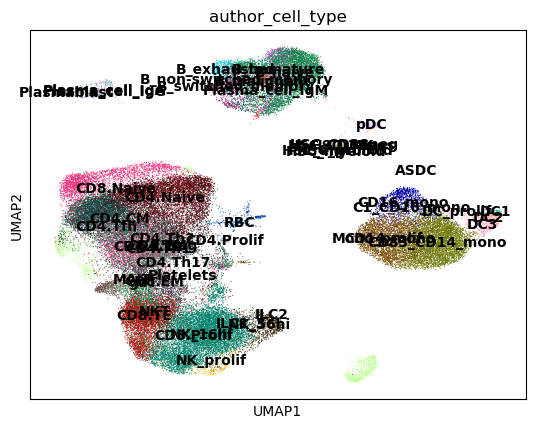

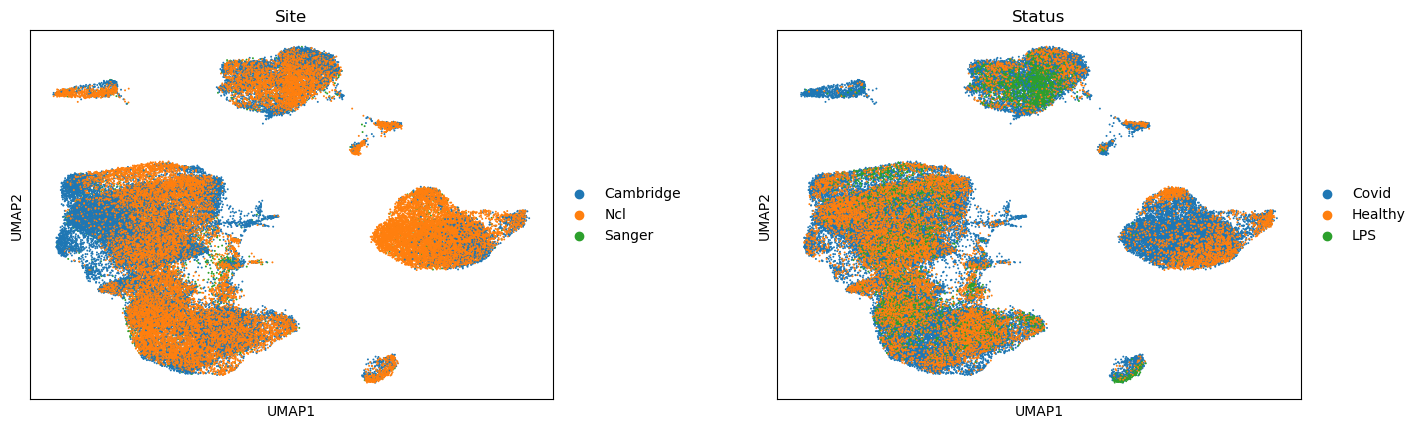

In [10]:
sc.pl.umap(adata, color=["author_cell_type"], legend_loc="on data")
sc.pl.umap(adata, color=["Site", "Status"], wspace=0.3, size=8)

## Run Milo analysis

In [12]:
## Exclude LPS samples
adata = adata[adata.obs["Status"] != "LPS"].copy()

## Initialize object for Milo analysis
milo = pt.tl.Milo()
mdata = milo.load(adata)

When initializing the Milo object, we create a MuData object which will store both the gene expression matrices (rna view) and cell count matrices used for differential abundance analysis (milo view).

In [13]:
mdata

MuData object with n_obs × n_vars = 59873 × 16299
  2 modalities
    rna:	59873 x 16299
      obs:	'Collection_Day', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'author_cell_type', 'organism', 'sex', 'tissue', 'ethnicity', 'disease', 'assay', 'cell_type', 'dataset_group', 'COVID_severity'
      var:	'gene_id', 'gene_name'
      uns:	'log1p', 'umap', 'author_cell_type_colors', 'Site_colors', 'Status_colors'
      obsm:	'X_scVI', 'X_umap'
    milo:	0 x 0

## Build KNN graph

We can use scanpy functions to build a KNN graph. We set the dimensionality and value for k to use in subsequent steps.

Here the value of k indicates the smallest possible size of neighbourhood in which we will quantify differential abundance (i.e. with k=50 the smallest neighbourhood will have 50 cells). Depending on the number of samples, you might want to use a high value of k for neighbourhood analysis, to have sufficient power to estimate abundance fold-changes. Since here we have data from > 100 patients, we set k=150 to have on average more than one cell per donor in each neighbourhood.

In [15]:
sc.pp.neighbors(mdata["rna"], use_rep="X_scVI", n_neighbors=150)

## Construct neighbourhoods

In [16]:
# This step assigns cells to a set of representative neighbourhoods on the KNN graph.
milo.make_nhoods(mdata["rna"], prop=0.1)

The assignment of cells to neighbourhoods is stored as a sparse binary matrix in mdata['rna'].obsm. Here we see that cells have been assigned to 4307 neighbourhoods.

In [17]:
mdata["rna"].obsm["nhoods"]

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 1291386 stored elements and shape (59873, 4307)>

The information on which cells are sampled as index cells of representative neighbourhoods is stored in mdata['rna'].obs, along with the distance of the index to the kth nearest neighbor, which is used later for the SpatialFDR correction.

In [18]:
mdata["rna"][mdata["rna"].obs["nhood_ixs_refined"] != 0].obs[["nhood_ixs_refined", "nhood_kth_distance"]]

,nhood_ixs_refined,nhood_kth_distance
10_1038_s41591_021_01329_2-S12_CTGTGCTAGCTCCTCT-1,1,0.971570
10_1038_s41591_021_01329_2-S11_TAAGCGTAGATCGGGT-1,1,1.470872
10_1038_s41591_021_01329_2-S12_CTTCTCTAGGCAGGTT-1,1,0.825768
10_1038_s41591_021_01329_2-S11_ACGGAGACACCGAAAG-1,1,1.442517
10_1038_s41591_021_01329_2-S12_AACCATGGTCCATCCT-1,1,0.754144
...,...,...
10_1038_s41591_021_01329_2-GGGCATCGTGTCAATC-newcastle74,1,0.877502
10_1038_s41591_021_01329_2-TGCACCTGTCAAAGCG-newcastle74,1,1.206315
10_1038_s41591_021_01329_2-ATTTCTGCATGAAGTA-newcastle74,1,0.904630
10_1038_s41591_021_01329_2-GTCGTAATCTCGAGTA-newcastle74,1,1.094851


We can visualize the distribution of neighbourhood sizes, to check that the minimal value of k makes sense, and that the distribution of sizes is not too wide.

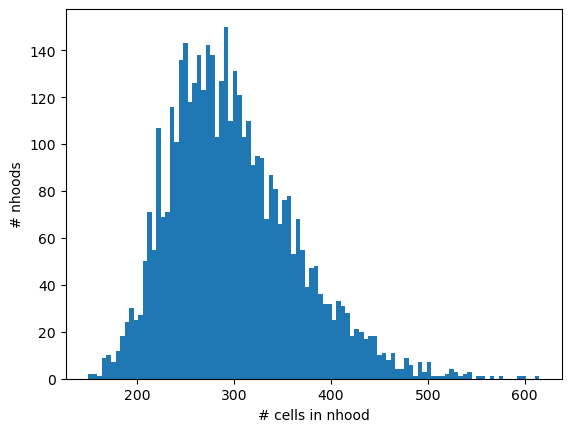

In [19]:
nhood_size = np.array(mdata["rna"].obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100)
plt.xlabel("# cells in nhood")
plt.ylabel("# nhoods");

## Count cells in neighbourhoods

Milo leverages the variation in cell numbers between replicates for the same experimental condition to test for differential abundance. Therefore we have to count how many cells from each sample (in this case the patient) are in each neighbourhood. We need to use the cell metadata saved in adata.obs and specify which column contains the sample information.

In [20]:
mdata = milo.count_nhoods(mdata, sample_col="patient_id")

mdata[‘milo’] is an anndata object where obs correspond to samples and vars correspond to neighbourhoods, and where .X stores the number of cells from each sample counted in a neighbourhood. This count matrix will be used for DA testing.

In [21]:
mdata

MuData object with n_obs × n_vars = 59873 × 16299
  2 modalities
    rna:	59873 x 16299
      obs:	'Collection_Day', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'author_cell_type', 'organism', 'sex', 'tissue', 'ethnicity', 'disease', 'assay', 'cell_type', 'dataset_group', 'COVID_severity', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      var:	'gene_id', 'gene_name'
      uns:	'log1p', 'umap', 'author_cell_type_colors', 'Site_colors', 'Status_colors', 'neighbors', 'nhood_neighbors_key'
      obsm:	'X_scVI', 'X_umap', 'nhoods'
      obsp:	'distances', 'connectivities'
    milo:	113 x 4307
      var:	'index_cell', 'kth_distance'
      uns:	'sample_col'

In [22]:
mdata["milo"]

AnnData object with n_obs × n_vars = 113 × 4307
    var: 'index_cell', 'kth_distance'
    uns: 'sample_col'

## Differential abundance testing with GLM

We are now ready to test for differential abundance in time. The experimental design needs to be specified with R-style formulas.

Here we run a simple comparison, testing for changes in cell abundance associated with COVID-19.


In [43]:
# Reorder categories (by default, the last category is taken as the condition of interest)
mdata["rna"].obs["Status"] = mdata["rna"].obs["Status"].cat.reorder_categories(["Healthy", "Covid"])
milo.da_nhoods(mdata, design="~Status")

We can explicitly specify the comparison we want to make using the parameter model_contrasts. This is especially important when we have more than two levels for a category and we want to compare against a specific control level.

Note that Milo supports two different solvers:

* “edger” which requires the edger package to be available in conjunction with rpy2. This solver is the closest to the original R implementation.

* “pydeseq2” which requires the pydeseq2 package to be available. The pydeseq2 solver is very close to the edger solver albeit a bit slower. However, it does not require R packages to be installed making it easier to use.

We can take potential confounders into account that could affect cell abundances such as batch effects by including them in the model using the syntax ~ confounders + condition, where the covariate specified in the last term is always the covariate of interest. In this case we estimate the effect of COVID-19 on cell abundance regressing out changes in cell abundance driven by the site of collection.

See below for more examples on how to specify different types of comparisons.

In [44]:
# If we wanted to only contrast Covid vs Healthy
# milo.da_nhoods(mdata, design="~Status", model_contrasts="StatusCovid-StatusHealthy", solver="pydeseq2")

# Taking Site and Status into account
milo.da_nhoods(mdata, design="~Site+Status", model_contrasts="StatusCovid", solver="pydeseq2")

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
/home/miniconda3/envs/pertpy/lib/python3.11/site-packages/pydeseq2/dds.py:532: UserWarning: Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.
  self.fit_size_factors(
Fitting dispersions...
... done in 0.53 seconds.

Fitting MAP dispersions...
... done in 0.62 seconds.

Fitting dispersions...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 0.47 seconds.

Fitting dispersions...
... done in 0.44 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting dispersions...
... done in 0.48 seconds.

Fitting MAP dispersions...
... done in 0.50 seconds.

Fitting dispersions...
... done in 0.48 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting dispersions...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 0.46 seconds.

Fitting dispersions...
... done in 0.43 seconds.

Fitting MAP dispersions...
... done in 0.46 seconds.

Fitting dispersions...
... 

Log2 fold change & Wald test p-value: Status Covid vs Healthy
      baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
0     2.158682       -0.292653  0.340988 -0.858251  0.390754  0.618287
1     2.217345       -0.508746  0.436591 -1.165270  0.243910  0.472781
2     2.088570       -0.012186  0.370980 -0.032847  0.973797  0.986521
3     1.812100        0.643904  0.430015  1.497399  0.134289  0.331643
4     1.617130       -0.044340  0.340515 -0.130215  0.896396  0.951374
...        ...             ...       ...       ...       ...       ...
4302  2.559301       -1.287541  0.490389 -2.625552  0.008651  0.055281
4303  2.064366       -0.858544  0.395238 -2.172221  0.029839  0.125627
4304  2.352310       -0.444906  0.545607 -0.815434  0.414824  0.640835
4305  2.565337        0.601088  0.420367  1.429910  0.152743  0.357923
4306  2.509117       -0.627448  0.521994 -1.202021  0.229356  0.457543

[4307 rows x 6 columns]


... done in 0.26 seconds.



The differential abundance test results are stored in milo_mdata['milo'].var. In particular:

* logFC: stores the log-Fold Change in abundance (i.e. the slope of the linear model)

* PValue stores the p-value for the test

* SpatialFDR stores the p-values adjusted for multiple testing (accounting for overlap between neighbourhoods)

In [45]:
mdata["milo"].var

,index_cell,kth_distance,F,adjust.method,comparison,test,SpatialFDR,logCPM,logFC,PValue,FDR
0,10_1038_s41591_021_01329_2-S12_CTGTGCTAGCTCCTCT-1,0.971570,0.608120,BH,StatusCovid,glm,0.636415,2.158682,-0.292653,0.390754,0.618287
1,10_1038_s41591_021_01329_2-S11_TAAGCGTAGATCGGGT-1,1.470872,0.147414,BH,StatusCovid,glm,0.493695,2.217345,-0.508746,0.243910,0.472781
2,10_1038_s41591_021_01329_2-S12_CTTCTCTAGGCAGGTT-1,0.825768,0.075817,BH,StatusCovid,glm,0.986761,2.088570,-0.012186,0.973797,0.986521
3,10_1038_s41591_021_01329_2-S11_ACGGAGACACCGAAAG-1,1.442517,3.354614,BH,StatusCovid,glm,0.351000,1.812100,0.643904,0.134289,0.331643
4,10_1038_s41591_021_01329_2-S12_AACCATGGTCCATCCT-1,0.754144,0.179969,BH,StatusCovid,glm,0.953675,1.617130,-0.044340,0.896396,0.951374
...,...,...,...,...,...,...,...,...,...,...,...
4302,10_1038_s41591_021_01329_2-GGGCATCGTGTCAATC-ne...,0.877502,9.023682,BH,StatusCovid,glm,0.063311,2.559301,-1.287541,0.008651,0.055281
4303,10_1038_s41591_021_01329_2-TGCACCTGTCAAAGCG-ne...,1.206315,7.893736,BH,StatusCovid,glm,0.138266,2.064366,-0.858544,0.029839,0.125627
4304,10_1038_s41591_021_01329_2-ATTTCTGCATGAAGTA-ne...,0.904630,1.322126,BH,StatusCovid,glm,0.658142,2.352310,-0.444906,0.414824,0.640835
4305,10_1038_s41591_021_01329_2-GTCGTAATCTCGAGTA-ne...,1.094851,1.747626,BH,StatusCovid,glm,0.377600,2.565337,0.601088,0.152743,0.357923


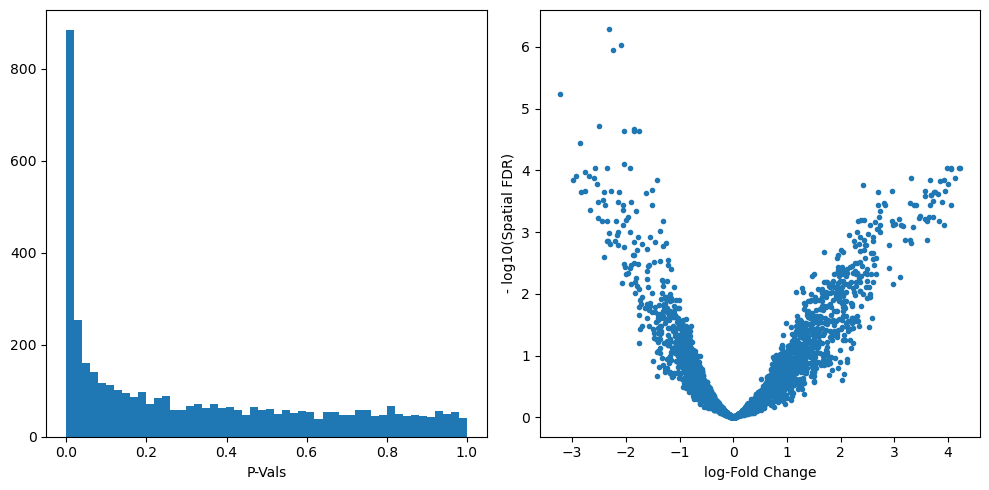

In [46]:
# We can start inspecting the results of our DA analysis from a couple of standard diagnostic plots.
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10, 5]
plt.subplot(1, 2, 1)
plt.hist(mdata["milo"].var.PValue, bins=50)
plt.xlabel("P-Vals")
plt.subplot(1, 2, 2)
plt.plot(mdata["milo"].var.logFC, -np.log10(mdata["milo"].var.SpatialFDR), ".")
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize


## Visualize results on embedding

To visualize DA results relating them to the embedding of single cells, we can build an abstracted graph of neighbourhoods that we can superimpose on the single-cell embedding. Here each node represents a neighbourhood, and the layout of nodes is determined by the position of the index cell in the UMAP embedding of all single-cells. The neighbourhoods displaying singificant DA are colored by their log-Fold Change.

In [47]:
milo.build_nhood_graph(mdata)

/home/miniconda3/envs/pertpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/miniconda3/envs/pertpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/miniconda3/envs/pertpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


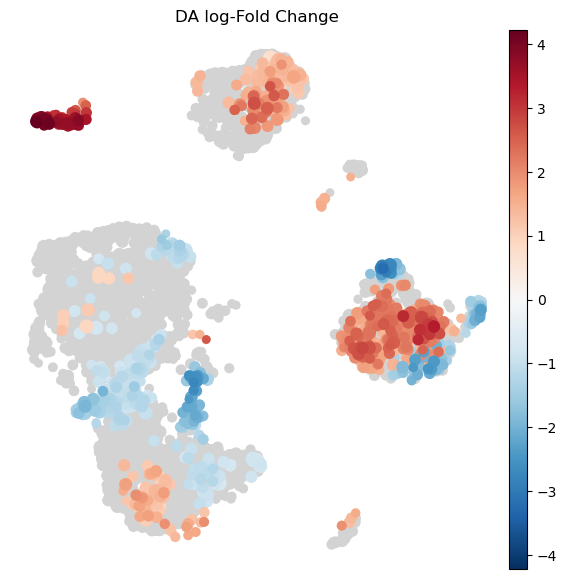

In [48]:
plt.rcParams["figure.figsize"] = [7, 7]
milo.plot_nhood_graph(
    mdata,
    alpha=0.1,  # SpatialFDR level (1%)
    min_size=1,  # Size of smallest dot
)

## Visuaalize result by celltype

We might want to visualize whether DA is particularly evident in certain cell types. To do this, we assign a cell type label to each neighbourhood by finding the most abundant cell type within cells in each neighbourhood (after all, neighbourhoods are in most cases small subpopulations within the same cell type). We can label neighbourhoods in the results data.frame using the function milo.annotate_nhoods. This also saves the fraction of cells harbouring the label.

In [49]:
milo.annotate_nhoods(mdata, anno_col="author_cell_type")

We can see that for the majority of neighbourhoods, almost all cells have the same cell type label. We can rename neighbourhoods where less than 60% of the cells have the top label as “Mixed”

Text(0.5, 0, 'celltype fraction')

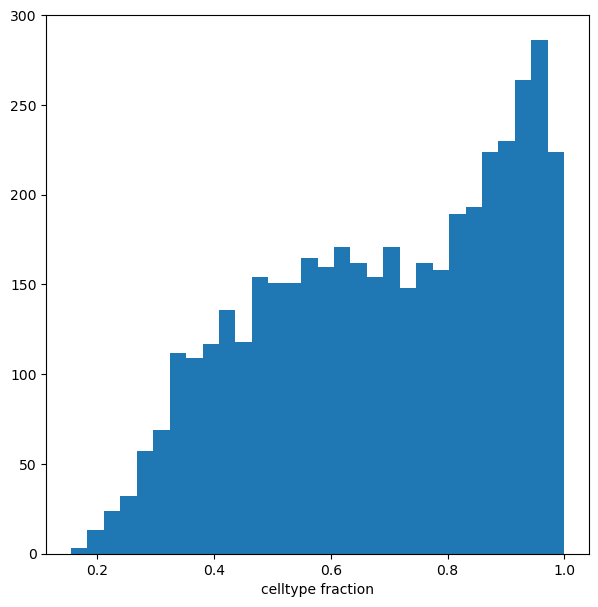

In [50]:
plt.hist(mdata["milo"].var["nhood_annotation_frac"], bins=30)
plt.xlabel("celltype fraction")

In [51]:
mdata["milo"].var["nhood_annotation"] = mdata["milo"].var["nhood_annotation"].cat.add_categories("Mixed")
mdata["milo"].var.loc[mdata["milo"].var["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Mixed"

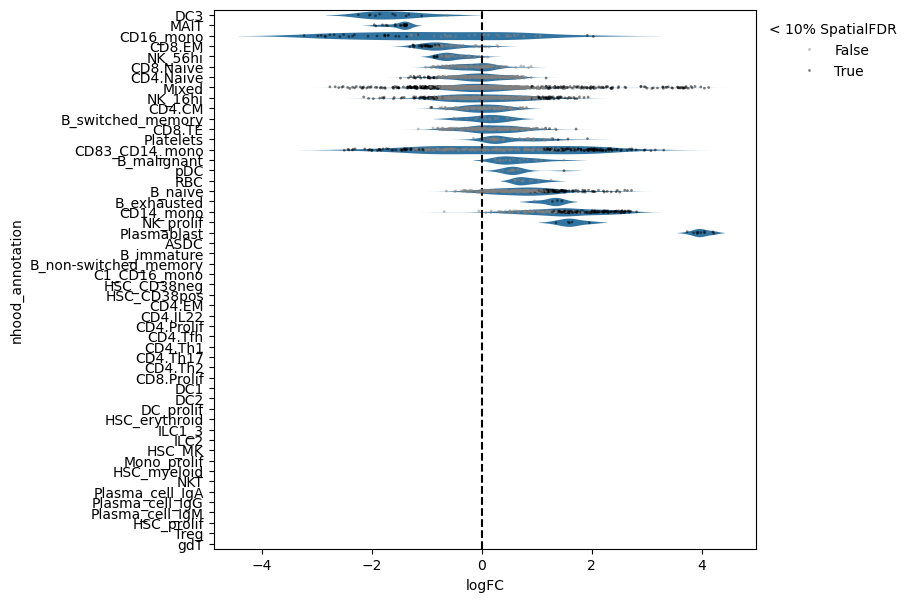

In [52]:
milo.plot_da_beeswarm(mdata, alpha=0.1)

This shows that neighbourhoods of Plasmablast cells, malignant B cells and monocytes are especially enriched in cells from COVID-19 samples.

We can check the effect size by visualizing the cell counts directly

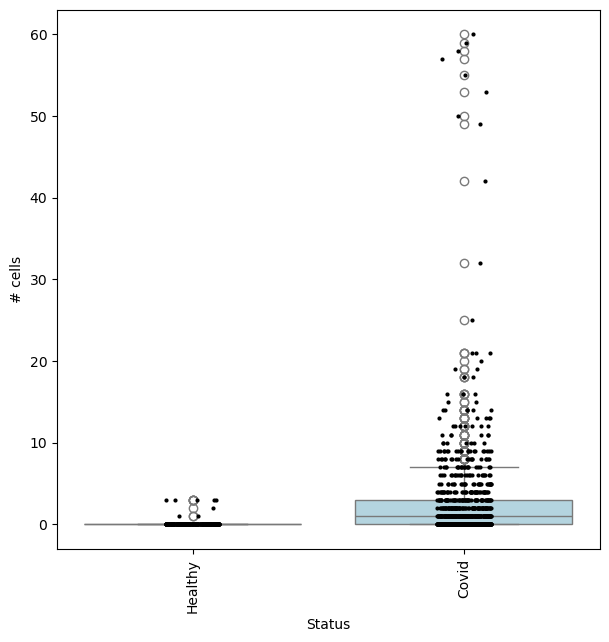

In [53]:
## Get IDs of plasmablast neighbourhood
pl_nhoods = mdata["milo"].var_names[
    (mdata["milo"].var["SpatialFDR"] < 0.1) & (mdata["milo"].var["nhood_annotation"] == "Plasmablast")
]

## Visualize cell counts by condition (x-axis) and individuals on all neighbourhoods
milo.plot_nhood_counts_by_cond(mdata, test_var="Status", subset_nhoods=pl_nhoods, log_counts=False)

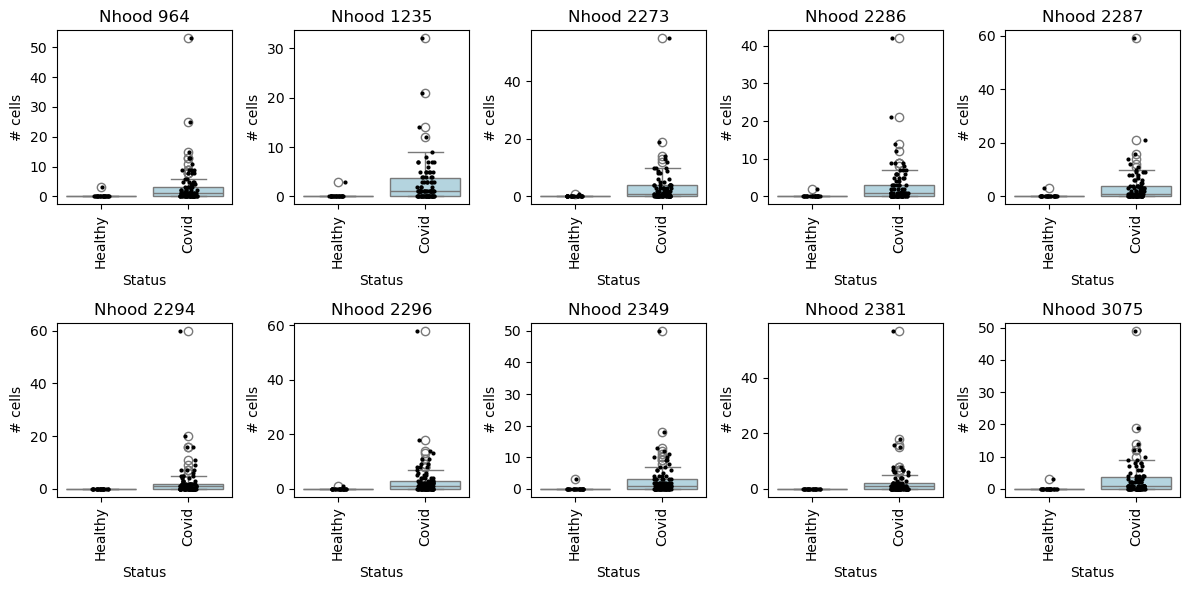

In [54]:
with matplotlib.rc_context({"figure.figsize": [12, 6]}):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.flatten()

    for i, nh in enumerate(pl_nhoods):
        milo.plot_nhood_counts_by_cond(
            mdata, test_var="Status", subset_nhoods=[nh], log_counts=False, ax=axes[i], show=False
        )
        axes[i].set_title(f"Nhood {nh}")

    plt.tight_layout()

## Spefifying DA comparision using model contrasts

We can compute fold-changes and p-values for multiple comparisons on the same set of neighbourhoods, by specifying the test of interest in the design and model_contrasts parameter.

For example, we can find neighbourhoods enriched in cells from Asymptomatic patients, compared to healthy individuals:

In [55]:
severity_order = ["Healthy", "Asymptomatic", "Mild", "Moderate", "Severe", "Critical"]
mdata["rna"].obs["COVID_severity"] = mdata["rna"].obs["COVID_severity"].cat.reorder_categories(severity_order)

In [56]:
milo.da_nhoods(mdata, design="~Site+COVID_severity", model_contrasts="COVID_severityAsymptomatic", solver="pydeseq2")
# no need to set "-COVID_severityHealthy", since this is the reference level

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
/home/miniconda3/envs/pertpy/lib/python3.11/site-packages/pydeseq2/dds.py:532: UserWarning: Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.
  self.fit_size_factors(
Fitting dispersions...
... done in 0.60 seconds.

Fitting MAP dispersions...
... done in 1.01 seconds.

Fitting dispersions...
... done in 0.46 seconds.

Fitting MAP dispersions...
... done in 0.46 seconds.

Fitting dispersions...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting dispersions...
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 0.44 seconds.

Fitting dispersions...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 0.43 seconds.

Fitting dispersions...
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 0.78 seconds.

Fitting dispersions...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 0.45 seconds.

Fitting dispersions...
... 

Log2 fold change & Wald test p-value: COVID_severity Critical vs Healthy
      baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
0     2.158682       -0.162850  0.498682 -0.326562  0.743999  0.892927
1     2.217345       -1.218614  0.669669 -1.819725  0.068801  0.275993
2     2.088570        0.470581  0.510376  0.922027  0.356514  0.645824
3     1.812100        1.601970  0.540168  2.965690  0.003020  0.039753
4     1.617130        0.101739  0.488089  0.208444  0.834883  0.937331
...        ...             ...       ...       ...       ...       ...
4302  2.559301       -1.737916  0.742445 -2.340799  0.019243  0.131327
4303  2.064366       -0.996505  0.604583 -1.648253  0.099301  0.342176
4304  2.352310       -0.806735  0.796610 -1.012710  0.311199  0.606271
4305  2.565337        0.258202  0.606177  0.425951  0.670143  0.854411
4306  2.509117       -0.978484  0.775881 -1.261126  0.207263  0.497664

[4307 rows x 6 columns]


... done in 0.25 seconds.



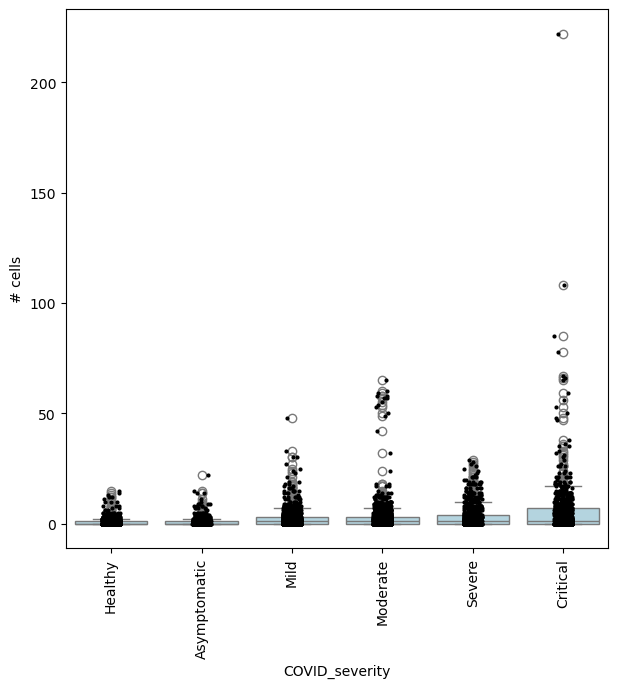

In [57]:
## Get IDs of enriched neighbourhoods
pl_nhoods = mdata["milo"].var_names[(mdata["milo"].var["SpatialFDR"] < 0.01) & (mdata["milo"].var["logFC"] > 2)]

## Visualize cell counts by condition (x-axis) and individuals on all signif neighbourhoods
milo.plot_nhood_counts_by_cond(mdata, test_var="COVID_severity", subset_nhoods=pl_nhoods, log_counts=False)

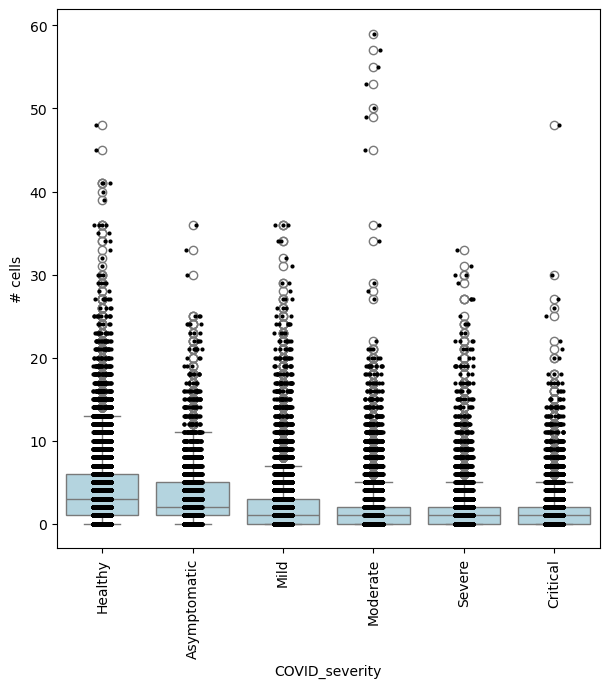

In [58]:
# or comparing Asymptomatic patients againsts all other COVID-19 patients:
milo.da_nhoods(
    mdata,
    design="~Site+COVID_severity",
    model_contrasts="COVID_severityAsymptomatic-(COVID_severityMild + COVID_severityModerate + COVID_severitySevere + COVID_severityCritical)",
    solver="edger",  # The pydeseq2 solver does not support such complex contrasts
)

## Get IDs of enriched neighbourhoods
pl_nhoods = mdata["milo"].var_names[(mdata["milo"].var["SpatialFDR"] < 0.1) & (mdata["milo"].var["logFC"] > 2)]

## Visualize cell counts by condition (x-axis) and individuals on all signif neighbourhoods
milo.plot_nhood_counts_by_cond(mdata, test_var="COVID_severity", subset_nhoods=pl_nhoods, log_counts=False)


In this case, we could also be interested in finding where cell abundance increases or decreases linearly with COVID-19 severity. To do this, we need to encode COVID severity as a continuous variable.

In [59]:
severity_order = ["Healthy", "Asymptomatic", "Mild", "Moderate", "Severe", "Critical"]
mdata["rna"].obs["COVID_severity_continuous"] = mdata["rna"].obs["COVID_severity"].cat.codes

In [60]:
milo.da_nhoods(mdata, design="~Site+COVID_severity_continuous", solver="pydeseq2")

Fitting size factors...
/home/miniconda3/envs/pertpy/lib/python3.11/site-packages/pydeseq2/dds.py:532: UserWarning: Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.
  self.fit_size_factors(


Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 0.40 seconds.

Fitting MAP dispersions...
... done in 0.43 seconds.

Fitting dispersions...
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 0.44 seconds.

Fitting dispersions...
... done in 0.40 seconds.

Fitting MAP dispersions...
... done in 0.44 seconds.

Fitting dispersions...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 0.44 seconds.

Fitting dispersions...
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 0.44 seconds.

Fitting dispersions...
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 0.52 seconds.

Fitting dispersions...
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 0.51 seconds.

Fitting dispersions...
... done in 0.48 seconds.

Fitting MAP dispersions...
... done in 0.49 seconds.

Fitting dispersions...
... done in 0.48 seconds.

Fitting MAP dispersions...
... done in 0.50 seconds.

Fitting dispersions...
... done in 0.47 seconds.

Fitting MAP di

Log2 fold change & Wald test p-value: COVID_severity_continuous 5 vs 0
      baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
0     2.158682       -0.085213  0.441786 -0.192882  0.847051  0.929849
1     2.217345       -0.829360  0.563203 -1.472577  0.140865  0.355647
2     2.088570        0.316224  0.463853  0.681733  0.495408  0.715089
3     1.812100        1.401824  0.500240  2.802305  0.005074  0.039052
4     1.617130        0.352215  0.431674  0.815929  0.414541  0.647409
...        ...             ...       ...       ...       ...       ...
4302  2.559301       -1.244335  0.656464 -1.895511  0.058025  0.202732
4303  2.064366       -1.028596  0.529955 -1.940914  0.052269  0.189257
4304  2.352310       -0.483228  0.698714 -0.691596  0.489191  0.711002
4305  2.565337        0.213090  0.514284  0.414342  0.678624  0.841313
4306  2.509117       -0.766523  0.673219 -1.138594  0.254873  0.498240

[4307 rows x 6 columns]


... done in 0.25 seconds.



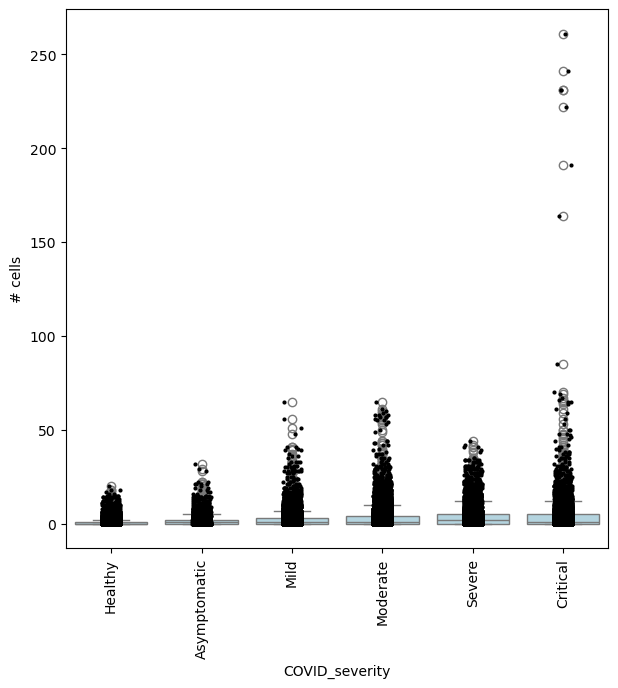

In [61]:
## Get IDs of enriched neighbourhoods
pl_nhoods = mdata["milo"].var_names[
    (mdata["milo"].var["SpatialFDR"] < 0.1) & (mdata["milo"].var["logFC"] > 0)
]  ## notice how here logFCs are much smaller

## Add COVID severity labels to mdata['milo'].obs
milo.add_covariate_to_nhoods_var(mdata, ["COVID_severity"])
mdata["milo"].obs["COVID_severity"] = (
    mdata["milo"].obs["COVID_severity"].astype("category").cat.reorder_categories(severity_order)
)

## Visualize cell counts by condition (x-axis) and individuals on all signif neighbourhoods
milo.plot_nhood_counts_by_cond(mdata, test_var="COVID_severity", subset_nhoods=pl_nhoods, log_counts=False)